# INF8225 TP1 H25 (v2.0)

Prénom - NOM / Matricule ########

Partie 3 réalisée: [seul(e)]
ou avec
[Prénom - NOM -
Matricule ########]

Date limite :

20h30 le 6 février 2025 (Partie 1 et 2)

20h30 le 20 février 2025 (Partie 3)

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

# Partie 1 (16 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


Considérons le réseau Bayésien ci-dessous.

<img src="https://drive.google.com/uc?id=1QCJSfYGLJVg2-0_BO8BEHCnMEDsHSR6k" alt="bayes_net" width="600"/>

Ceci représente un modèle simple pour les notes à un examen (G) et sa relation avec les étudiants qui se préparent aux examens et font correctement le travail pour les devoirs (S), les étudiants qui ont des difficultés dans la vie juste avant l'examen final (D), les étudiants qui réussissent bien à un entretien technique pour un emploi axé sur le sujet du cours (R), et des étudiants qui se retrouvent sur une sorte de palmarès de leur programme (L).

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : Se préparer (S)
axe 1 : Difficultés avant l'exam (D)
axe 2 : Réussir l'entretien technique (R)
axe 3 : Note dans le cours (Grade) (G)
axe 4 : Liste d'honneur (L)
```

Chaque `axe` serait de dimension `2` ou `3`:
```
Exemple pour S:
0 : s0
1 : s1

Exemple pour G:
0 : g0
1 : g1
2 : g2
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [1]:
import numpy as np
np.set_printoptions(precision=5)

# Les tableaux sont bâtis avec les dimensions (S, D, R, G, L)
# et chaque dimension avec les probablités associées aux 2 ou 3 valeurs possibles ({0, 1} ou {0, 1, 2})

Pr_S = np.array([0.2, 0.8]).reshape(2, 1, 1, 1, 1) # Donné en exemple
Pr_D = np.array([0.9, 0.1]).reshape(1, 2, 1, 1, 1) # TODO
Pr_R_given_S = np.array([[0.9, 0.1] , [0.2 , 0.8]]).reshape(2, 1, 2, 1, 1) # TODO
Pr_G_given_SD = np.array([[[0.5 , 0.3 , 0.2] , [0.9 , 0.08 , 0.02]] , [[0.1 , 0.2 , 0.7] , [0.3 , 0.4 , 0.3]]]).reshape(2, 2, 1, 3, 1) # TODO
Pr_L_given_G =  np.array([[0.9, 0.1] , [0.6 , 0.4] , [0.01 , 0.99]] ).reshape(1, 1, 1, 3, 2)  # TODO

print (f"Pr(S)=\n{np.squeeze(Pr_S)}\n")
print (f"Pr(D)=\n{np.squeeze(Pr_D)}\n")
print (f"Pr(R|S)=\n{np.squeeze(Pr_R_given_S)}\n")
print (f"Pr(G|S,D)=\n{np.squeeze(Pr_G_given_SD)}\n")
print (f"Pr(L|G)=\n{np.squeeze(Pr_L_given_G)}\n")

Pr(S)=
[0.2 0.8]

Pr(D)=
[0.9 0.1]

Pr(R|S)=
[[0.9 0.1]
 [0.2 0.8]]

Pr(G|S,D)=
[[[0.5  0.3  0.2 ]
  [0.9  0.08 0.02]]

 [[0.1  0.2  0.7 ]
  [0.3  0.4  0.3 ]]]

Pr(L|G)=
[[0.9  0.1 ]
 [0.6  0.4 ]
 [0.01 0.99]]


## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous. Dans les cas où l'on compare un calcul non interventionnel à un calcul interventionnel, commentez sur l'interprétation physique des deux situations et les résultats obtenus à partir de vos modèles.

a) $Pr(G) = [P (G = g^0), P (G = g^1), P (G = g^2)]$

In [2]:
joint  = Pr_G_given_SD * Pr_S * Pr_D* Pr_R_given_S * Pr_L_given_G
answer_a = np.sum(joint, axis=(0, 1, 2 , 4)) # TODO
print(f"Pr(G)={answer_a}")

Pr(G)=[0.204  0.2316 0.5644]


In [3]:
answer_a.shape

(3,)



```
# Ce texte est au format code
```

b) $Pr(G|R = r^1)$

In [4]:
Pr_GR = np.sum(Pr_G_given_SD * Pr_R_given_S[:, :, 1:2, :, :] * Pr_S  * Pr_D, axis=(0, 1)) # TODO
Pr_R = np.sum(
    Pr_R_given_S[:, :, 1:2, :, :] * Pr_S,
    axis=(0, 1, 2, 4)  # Somme sur S et les autres dimensions
)
answer_b = (Pr_GR / Pr_R).squeeze()
print(f"Pr(G|R=r1)={answer_b}")

Pr(G|R=r1)=[0.13273 0.22176 0.64552]


In [5]:
Pr_GR = np.sum(joint[: , : , 1:2 ,: ,:] , axis=(0,1,4))
Pr_R = np.sum(joint[: , : , 1:2 ,: ,:] , axis=(0,1,3,4))
answer_b = (Pr_GR / Pr_R).squeeze()
print(f"Pr(G|R=r1)={answer_b}")

Pr(G|R=r1)=[0.13273 0.22176 0.64552]


c)  $Pr(G|R = r^0)$

In [6]:
Pr_GR = np.sum(joint[: , : , 0:1 ,: ,:] , axis=(0,1,4))
Pr_R = np.sum(joint[: , : , 0:1 ,: ,:] , axis=(0,1,2,3,4))

answer_c = (Pr_GR / Pr_R).squeeze()
print(f"Pr(G|R=r0)={answer_c}")

Pr(G|R=r0)=[0.34235 0.25071 0.40694]


d) $Pr(G|R=r^1, S=s^0)$

In [7]:
Pr_R

0.3400000000000001

In [8]:

answer_d =  np.sum(Pr_G_given_SD[0:1  , : , : , : , :]  * Pr_S[0:1 , : , : , : , :]  * Pr_D, axis=(0, 1 , 2 , 4))/np.squeeze(Pr_S[0:1 , : , : , : , :])

print(f"Pr(G|R=r1, S=s0)={answer_d}")

Pr(G|R=r1, S=s0)=[0.54  0.278 0.182]


In [9]:
Pr_GRS = np.sum(joint[0:1,:,1:2,:,:] , axis=(0,1,2,4))
Pr_RS = np.sum(joint[0:1 , : , 1:2 ,: ,:] , axis=(0,1,2,3,4))
answer_d =  (Pr_GRS / Pr_RS).squeeze()
print(f"Pr(G|R=r1, S=s0)={answer_d}")

Pr(G|R=r1, S=s0)=[0.54  0.278 0.182]


e) $Pr(G|R=r^0, S=s^0)$

In [10]:
Pr_GRS = np.sum(joint[0:1,:,0:1,:,:] , axis=(0,1,2,4))
Pr_RS = np.sum(joint[0:1 , : , 1:2 ,: ,:] , axis=(0,1,2,3,4))

answer_e = (Pr_GRS / Pr_RS).squeeze()  # TODO
print(f"Pr(G|R=r0, S=s0)={answer_e}")

Pr(G|R=r0, S=s0)=[4.86  2.502 1.638]


f) $Pr(R|D=d^1)$

In [11]:
Pr_RD =  np.sum(joint[:,1:2,:,:,:] , axis=(0,1,3,4))
Pr_D1 =  np.sum(joint[:,1:2,:,: ,:] , axis=(0,1,2,3,4))
answer_f = (Pr_RD / Pr_D1).squeeze()

print(f"Pr(R|D=d1)={answer_f}")

Pr(R|D=d1)=[0.34 0.66]


g) $Pr(R|D=d^0)$

In [12]:
Pr_RD =  np.sum(joint[:,0:1,:,:,:] , axis=(0,1,3,4))
Pr_D1 =  np.sum(joint[:,0:1,:,: ,:] , axis=(0,1,2,3,4))
answer_g = (Pr_RD / Pr_D1).squeeze()   # TODO
print(f"Pr(R|D=d0)={answer_g}")

Pr(R|D=d0)=[0.34 0.66]


**h**) $Pr(R|D=d^1, G=g^2)$

In [13]:
Pr_RDG =  np.sum(joint[:,1:2,:,2:3,:] , axis=(0,1,3,4))
Pr_DG =  np.sum(joint[:,1:2,:,2:3 ,:] , axis=(0,1,2,3,4))
answer_h =  (Pr_RDG / Pr_DG).squeeze()   # TODO
print(f"Pr(R|D=d1, G=g2)={answer_h}")

Pr(R|D=d1, G=g2)=[0.21148 0.78852]


i) $Pr(R|D=d^0, G=g^2)$

In [14]:
Pr_RDG =  np.sum(joint[:,0:1,:,2:3,:] , axis=(0,1,3,4))
Pr_DG =  np.sum(joint[:,0:1,:,2:3 ,:] , axis=(0,1,2,3,4))
answer_i =  (Pr_RDG / Pr_DG).squeeze()   # TODO
print(f"Pr(R|D=d0, G=g2)={answer_i}")

Pr(R|D=d0, G=g2)=[0.24667 0.75333]


j) $Pr(R|D=d^1, L=l^1)$

In [15]:
Pr_RDL =  np.sum(joint[:,1:2,:,:, 1:2] , axis=(0,1,3,4))
Pr_DL =  np.sum(joint[:,1:2,:,: ,1:2] , axis=(0,1,2,3,4))
answer_j =  (Pr_RDL / Pr_DL).squeeze() # TODO
print(f"Pr(R|D=d1, L=l1)={answer_j}")

Pr(R|D=d1, L=l1)=[0.2475 0.7525]


k) $Pr(R|D=d^0, L=l^1)$

In [16]:
Pr_RDL =  np.sum(joint[:,0:1,:,:, 1:2] , axis=(0,1,3,4))
Pr_DL =  np.sum(joint[:,0:1,:,: ,1:2] , axis=(0,1,2,3,4))
answer_k =  (Pr_RDL / Pr_DL).squeeze() # TODO
print(f"Pr(R|D=d1, L=l1)={answer_k}")

Pr(R|D=d1, L=l1)=[0.2736 0.7264]


l) $Pr(R|do(G=g^2))$

In [17]:
joint_2 = Pr_L_given_G[:,:,:,2:3 ,:] * Pr_R_given_S * Pr_S * Pr_D
answer_l =  np.sum(joint_2[:,:,:,:,:] , axis=(0,1,3,4)) # TODO
print(f"Pr(R|do(G=g2))={answer_l}")

Pr(R|do(G=g2))=[0.34 0.66]


m) $Pr(R|G=g^2)$

In [18]:
joint_2.shape

(2, 2, 2, 1, 2)

In [19]:
Pr_RG =  np.sum(joint[:,:,:,2:3,:] , axis=(0,1,3,4))
Pr_G2 =  np.sum(joint[:,:,:,2:3 ,:] , axis=(0,1,2,3,4))
answer_m = (Pr_RG / Pr_G2).squeeze() # TODO
print(f"Pr(R|G=g2)={answer_m}")

Pr(R|G=g2)=[0.24515 0.75485]


n) $Pr(R)$

In [20]:
answer_n = np.sum(Pr_R_given_S * Pr_S, axis=(0,1,3 ,4)) # TODO
print(f"Pr(R={answer_n}")

Pr(R=[0.34 0.66]


o) $Pr(G|do(L=l^1))$

In [21]:
joint_3 = Pr_G_given_SD * Pr_S * Pr_D * Pr_R_given_S
answer_o =  np.sum( joint_3, axis=(0,1,2,4))# TODO
print(f"Pr(G|do(L=l1))={answer_o}")

Pr(G|do(L=l1))=[0.204  0.2316 0.5644]


p) $Pr(G=1|L=l^1)$

In [22]:
Pr_GL =  np.sum(joint[:,:,:,:,1:2] , axis=(0,1,2,4))
Pr_L1 =  np.sum(joint[:,:,:,:,1:2] , axis=(0,1,2,3,4))

answer_p = (Pr_GL / Pr_L1).squeeze()[1]  # TODO
print(f"Pr(G=1|L=l1)={answer_p}")

Pr(G=1|L=l1)=0.13789900505510602


**Réponse:**

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient


Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x})
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})}
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathscr{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big)
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathscr{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathscr{C}|}{|\mathscr{D}|}
$$
où l'ensemble des échantillons bien classés $\mathscr{C}$ est:
$$
\mathscr{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathscr{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- **Lire l'article de recherche -
Adam**: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR).
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [1]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y


# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

In [2]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))

        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")

        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)

    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

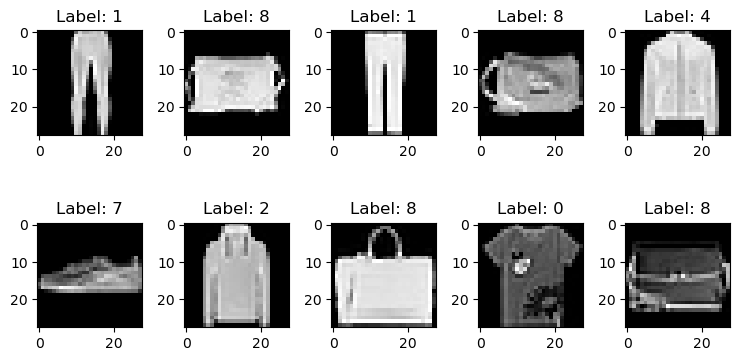

In [3]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")

  plt.tight_layout()
  plt.show()
plot_samples()

## Fonctions à compléter

In [4]:
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = len(y)

    # todo : calcul du nombre d'éléments bien classifiés.
    card_C = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y, dim=1)).item()

    # todo : calcul de la précision de classification.
    acc = card_C/card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    y_pred = torch.clamp(y_pred, min=1e-9, max=1.0)
    loss = -torch.sum(y * torch.log(y_pred))
    return loss.item()

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(torch.tensor([[1000, 10000, 100000],]))

    # todo : calcul des valeurs de softmax(x)
    x_max = torch.max(x, dim=axis, keepdim=True)
    x = x - x_max.values
    exp_x = torch.exp(x)
    values = exp_x / torch.sum(exp_x, dim=axis, keepdim=True)

    return values

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    ones_shape = list(x.shape)

    ones_shape[axis] = 1
    ones = torch.ones(ones_shape, dtype=x.dtype, device=x.device)

    # Concatenate the ones along the specified axis
    x_tilde = torch.cat([x, ones], dim=axis)

    return x_tilde

In [5]:
class LinearModel:
    def __init__(self, num_features, num_classes):
      self.params = torch.normal(0, 0.01, (num_features + 1, num_classes))

      self.t = 0
      self.m_t = 0 # pour Adam: moyennes mobiles du gradient
      self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
      # todo : implémenter calcul des outputs en fonction des inputs `x`.
      inputs = inputs_tilde(x)
      outputs = softmax(torch.matmul(inputs, self.params))
      return outputs

    def get_grads(self, y, y_pred, X):
      # todo : implémenter calcul des gradients.
      grads = inputs_tilde(X).T @ (y_pred - y)
      return grads

    def sgd_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      self.params -= lr * grads 

    def adam_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      B1 = 0.9
      B2 = 0.999
      eps = 1e-8
      self.t += 1
      self.m_t = 0.9 * self.m_t + 0.1 * grads
      self.v_t = 0.999 * self.v_t + 0.001 * torch.square(grads)
      m_hat = self.m_t / (1 - B1**self.t)
      v_hat = self.v_t / (1 - B2**self.t)
      self.params -= lr * m_hat / (torch.sqrt(v_hat) + eps)

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        #print(f"epoch {epoch}")
        #print(data_loader_train)

        if epoch > 0:
          for x, y in data_loader_train:
              x, y = reshape_input(x, y)
              y_pred = model.forward(x)
              loss = cross_entropy(y, y_pred)
              grads = model.get_grads(y, y_pred, x)
              if sgd:
                model.sgd_update(lr, grads)
              else:
                model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          best_val_accuracy = accuracy_val
          best_model = model
          #print("best model")   # TODO : record the best model parameters and best validation accuracy

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train: loss={loss_train:.3f}, accuracy={accuracy_train*100:.1f}%, \
                Valid: loss={loss_val:.3f}, accuracy={accuracy_val*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


In [14]:
batch_size = 5
data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
logger = Logger()
model = LinearModel(num_features=784, num_classes=10)
for x, y in data_loader_train:
    #print(x.shape)
    #print(y.shape)
    x, y = reshape_input(x, y)

    y_pred = model.forward(x)
    loss = cross_entropy(y, y_pred)
    grads = model.get_grads(y, y_pred, x)
    model.sgd_update(0.1, grads)

accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

## Évaluation

### SGD: Recherche d'hyperparamètres

In [15]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1,20,200,1000]   # Define ranges in a list
lr_list = [0.1,0.01,0.001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 1
Epoch  0,                 Train: loss=2.317, accuracy=11.6%,                 Valid: loss=2.316, accuracy=12.1%
Epoch  1,                 Train: loss=3.275, accuracy=73.8%,                 Valid: loss=3.283, accuracy=72.9%
Epoch  2,                 Train: loss=2.547, accuracy=80.5%,                 Valid: loss=2.656, accuracy=79.8%
Epoch  3,                 Train: loss=2.339, accuracy=80.2%,                 Valid: loss=2.463, accuracy=79.3%
Epoch  4,                 Train: loss=1.732, accuracy=83.1%,                 Valid: loss=1.935, accuracy=81.8%
Epoch  5,                 Train: loss=1.549, accuracy=85.3%,                 Valid: loss=1.798, accuracy=83.4%
validation accuracy = 83.350
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0,                 Train: loss=2.

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1      | 20     | 200          | 1000   |
-------------------|--------|--------|--------------|--------|
**0.1**   | 83.350 | 83.533 | 83.333       | 76.733 | 
**0.01** | 84.617 | 84.383 | 80.250       | 79.417 | 
**0.001**  | 85.017 | 85.283 | 84.317 | 80.800 | 

### SGD: Analyse du meilleur modèle

Epoch  0,                 Train: loss=2.287, accuracy=9.2%,                 Valid: loss=2.289, accuracy=9.4%
Epoch  1,                 Train: loss=0.524, accuracy=82.5%,                 Valid: loss=0.531, accuracy=82.8%
Epoch  2,                 Train: loss=0.483, accuracy=83.5%,                 Valid: loss=0.497, accuracy=83.1%
Epoch  3,                 Train: loss=0.462, accuracy=84.1%,                 Valid: loss=0.480, accuracy=83.5%
Epoch  4,                 Train: loss=0.454, accuracy=84.4%,                 Valid: loss=0.469, accuracy=84.0%
Epoch  5,                 Train: loss=0.436, accuracy=85.2%,                 Valid: loss=0.454, accuracy=84.5%
Best validation accuracy = 84.450
Evaluation of the best training model over test set
------
Loss : 0.474
Accuracy : 83.420


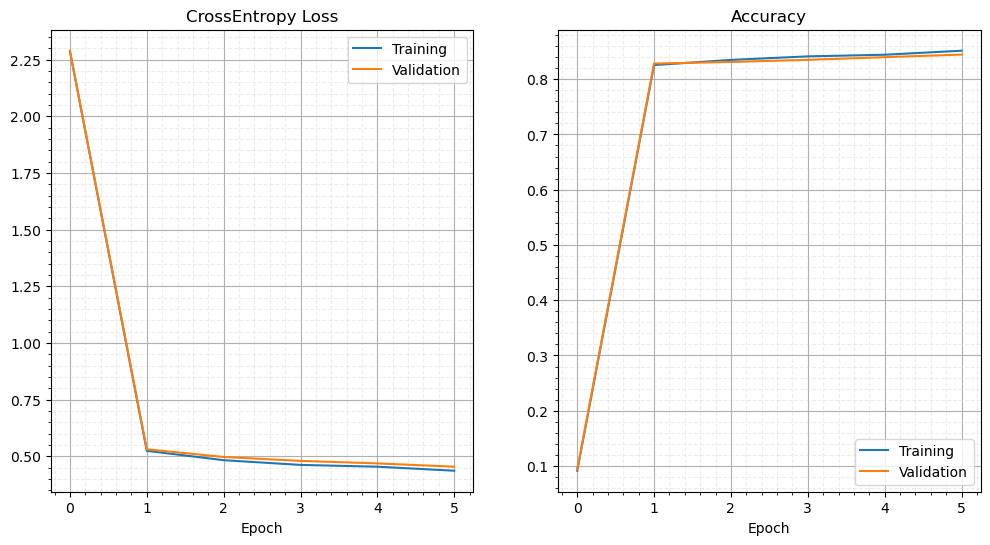

In [8]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

# Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [6]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1 , 20 , 200 , 1000]   # Define ranges in a list
lr_list = [0.1 , 0.01 , 0.001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 1
Epoch  0,                 Train: loss=2.339, accuracy=4.2%,                 Valid: loss=2.338, accuracy=4.1%
Epoch  1,                 Train: loss=3.311, accuracy=82.7%,                 Valid: loss=3.432, accuracy=82.2%
Epoch  2,                 Train: loss=4.286, accuracy=77.6%,                 Valid: loss=4.430, accuracy=76.9%
Epoch  3,                 Train: loss=4.533, accuracy=76.7%,                 Valid: loss=4.716, accuracy=76.0%
Epoch  4,                 Train: loss=3.532, accuracy=81.6%,                 Valid: loss=3.891, accuracy=80.1%
Epoch  5,                 Train: loss=3.797, accuracy=80.2%,                 Valid: loss=3.975, accuracy=79.5%
validation accuracy = 82.183
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0,                 Train: loss=2.31

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1      | 20     | 200    | 1000   |  
-------------------|--------|--------|--------|--------|
**0.1**   | 82.017 | 83.283 | 83.100 | 81.467 | 
**0.01** | 81.000 | 83.100 | 85.683 | 85.883 |
**0.001**  | 84.683 | 85.700 | 83.900 | 81.800 | 

### Adam: Analyse du meilleur modèle

In [17]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1000 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

KeyboardInterrupt: 

### Analyse des Résultats

Les résultats montrent qu'ADAM est plus stable et performant que SGD, surtout avec des tailles de lots plus grandes. En particulier, pour un taux d'apprentissage de 0.01, ADAM surpasse nettement SGD, atteignant une meilleure précision à partir de 200 et 1000 échantillons. En revanche, SGD présente des performances fluctuantes, avec une bonne précision pour de petites tailles de lots mais une chute importante avec des lots plus grands, surtout pour les taux d'apprentissage faibles (0.001). Ainsi, ADAM semble offrir une meilleure capacité de généralisation et de convergence, surtout avec un taux d'apprentissage modéré.

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathscr{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  )
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax:
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, 

\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (15 points)
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente. Comparez vos gradients et votre optimisation avec le même modèle optimisé avec Autograd. Lequel est le plus rapide ? Proposez quelques expériences. Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.


**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc. **Une fois que vous avez implémenté votre modèle, vous devez le comparer avec un modèle construit en utilisant les capacités de pytorch qui permettent une différenciation automatique. Autrement dit, pour la deuxième implémentation, vous pouvez utiliser torch.nn, torch.autograd ou à la méthode .backward().** Vous pouvez utiliser l’implémentation de votre choix pour explorer différentes architectures de modèles.

# Modèle de Réseau de Neurones Général à n Couches

Soit les transformations suivantes dans un réseau de neurones avec \( n \) couches cachées :

## 1. Propagation Avant

### **Entrée** :
$$
\mathbf{x} = \text{input}
$$

### **Transformation Linéaire et Activation à Chaque Couche**

Pour chaque couche cachée l allant de 1 à n : 

1. **Préactivation** :
     $$
     \mathbf{a}^{(1)} = \boldsymbol{\theta}^{(1)} \mathbf{x}
     $$
   - Pour $\( l > 1 \)$ :
     $$
     \mathbf{a}^{(l)} = \boldsymbol{\theta}^{(l)} \tilde{\mathbf{h}}^{(l-1)}
     $$
2. **Activation ReLU** :
   $$
   \mathbf{h}^{(l)} = \text{ReLU}'(\mathbf{a}^{(l)})
   $$

où :

 $\tilde{\mathbf{h}}^{(l-1)}$ est le vecteur $\mathbf{h}^{(l-1)}$ auquel on ajoute une composante égale à 1 à la fin pour inclure le biais.


### **Dernière Couche (Sortie)**

1. **Transformation linéaire finale** :
   $$
   \mathbf{a}^{(n+1)} = \boldsymbol{\theta}^{(n+1)} \tilde{\mathbf{h}}^{(n)}

   $$
2. **Sortie avec softmax** :
   $$
   \mathbf{h}^{(n+1)} = \hat{y} = \text{softmax}(\mathbf{a}^{(n+1)})
   $$

### **Fonction de Coût (Cross-Entropy)**

La fonction de coût est définie comme :
$$
J = CE(y, \hat{y})
$$

## 2. Calcul du Gradient pour la Rétropropagation

Nous savons d'après le cours que  :
$$
\frac{\partial J}{\partial \mathbf{a}^{(n+1)}} = \hat{y} - y
$$

Ensuite, en appliquant la règle de la chaîne, nous avons :
$$
\frac{\partial J}{\partial \boldsymbol{\theta}^{(n+1)}} = \left( \frac{\partial J}{\partial \mathbf{a}^{(n+1)}} \right) \cdot \left( \frac{\partial \mathbf{a}^{(n+1)}}{\partial \boldsymbol{\theta}^{(n+1)}} \right)
$$

$$
\frac{\partial J}{\partial \boldsymbol{\theta}^{(n+1)}} = (\hat{y} - y) \cdot  \tilde{\mathbf{h}}^{(n)}
$$

De même,  pour $ \( l \neq 1 \)$, on a : 
$$
\frac{\partial J}{\partial \boldsymbol{\theta}^{(l)}} = 
\left( \frac{\partial J}{\partial \mathbf{a}^{(n+1)}} \right) \cdot  
\left( \frac{\partial \mathbf{a}^{(n+1)}}{\partial \mathbf{h}^{(n)}} \right) \cdot 
\left( \frac{\partial \mathbf{h}^{(n)}}{\partial \mathbf{a}^{(n)}} \right) \cdot 
\left( \frac{\partial \mathbf{a}^{(n)}}{\partial \mathbf{h}^{(n-1)}} \right) \cdot  
\left( \frac{\partial \mathbf{h}^{(n-1)}}{\partial \mathbf{a}^{(n-1)}} \right) \cdot ... \cdot 
\left( \frac{\partial \mathbf{a}^{(l)}}{\partial \boldsymbol{\theta}^{(l) \right)
$$

$$
\frac{\partial J}{\partial \boldsymbol{\theta}^{(l)}} = (\hat{y} - y) 
\cdot \left(  W^{(n+1)} \odot \text{ReLU}'(\mathbf{a}^{(n)}) \right) 
\cdot \left( W^{(n)} \odot \text{ReLU}'(\mathbf{a}^{(n-1)})  \right) 
\cdot ... \cdot
\tilde{\mathbf{h}}^{(n)
$$

$$
\frac{\partial J}{\partial \boldsymbol{\theta}^{(l)}} = (\hat{y} - y) 
\cdot \prod_{k=l}^{n} \left( W^{(k+1)} \odot \text{ReLU}'(\mathbf{a}^{(k)}) \right) 
\cdot \tilde{\mathbf{h}}^{(l-1)}
$$




Nous introduisons alors un paramètre intermédiaire, appelé **delta**, défini entre 1 et $l+1$ comme :
$$
\delta^{(n+1)} = \frac{\partial J}{\partial \mathbf{a}^{(n+1)}} = \hat{y} - y
$$

$$
\delta^{(l)} = \delta^{(l+1)}  \cdot \left( W^{(l+1)} \odot \text{ReLU}'(\mathbf{a}^{(l)}) \right) 
$$


Ainsi, nous avons alors pour chaque couche  :
$$
\nabla \boldsymbol{\theta}^{(l)} = \mathbf{h}^{(l)T} \cdot \delta^{(l+1)}
$$

Seule la dernière couche diffère. En effet, on a : 
$$
\nabla \boldsymbol{\theta}^{(1)} = \mathbf{x}^{T} \cdot \delta^{(1)}
$$



## Fonctions à compléter

In [6]:
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2'''
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    # todo : nombre d'éléments à classifier.
    card_D = len(y)

    # todo : calcul du nombre d'éléments bien classifiés.
    card_C = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y, dim=1)).item()

    # todo : calcul de la précision de classification.
    acc = card_C/card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    ones_shape = list(x.shape)

    ones_shape[axis] = 1
    ones = torch.ones(ones_shape, dtype=x.dtype, device=x.device)

    # Concatenate the ones along the specified axis
    x_tilde = torch.cat([x, ones], dim=axis)

    return x_tilde

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    y_pred = torch.clamp(y_pred, min=1e-9, max=1.0)
    loss = -torch.sum(y * torch.log(y_pred))
    return loss

def softmax(x, axis=-1): # x of size[batch_size , number of classes]
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(torch.tensor([[1000, 10000, 100000],]))

    # todo : calcul des valeurs de softmax(x)
    x_max = torch.max(x, dim=axis, keepdim=True)
    x = x - x_max.values
    exp_x = torch.exp(x)
    values = exp_x / torch.sum(exp_x, dim=axis, keepdim=True)
    return values


def softmax_cross_entropy_backward(y, y_pred):
    # todo : calcul de la valeur du gradient de l'entropie croisée composée avec `softmax`
    values = y_pred - y
    return values

def relu_forward(x): ##x of size [batch size, num_features]
    # todo : calcul des valeurs de relu(x)
    values = torch.max(torch.zeros_like(x), x)
    return values

def relu_backward(x): ##x of size [batch size, num_features]
    # todo : calcul des valeurs du gradient de la fonction `relu`
    values = torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))
    return values


# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes
        self.params = []

        # todo : initialiser la liste des paramètres Teta de l'estimateur.

        for i in range(n_hidden_layers+1):
            if i == 0:
                self.params.append(torch.normal(0, 0.01, (n_features + 1, n_hidden_features)))
            elif i == n_hidden_layers :
              self.params.append(torch.normal(0, 0.01, (n_hidden_features + 1, n_classes)))
            else:
              self.params.append(torch.normal(0, 0.01, (n_hidden_features + 1, n_hidden_features)))
        print(f"Teta params={[p.shape for p in self.params]}")

        self.a = [] # liste contenant le resultat des multiplications matricielles
        self.h = [] # liste contenant le resultat des fonctions d'activations

        self.t = 0
        self.m_t = 0 # pour Adam: moyennes mobiles du gradient
        self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
        # todo : implémenter calcul des outputs en fonction des inputs `x`.
        self.a = []
        self.h = []
        inputs = inputs_tilde(x)
        for i in range(self.n_hidden_layers+1):
            if i == 0:
              self.a.append(torch.matmul(inputs, self.params[i]))
            else:
              self.a.append(torch.matmul(self.h[i-1], self.params[i]))

            if i == self.n_hidden_layers:
              self.h.append(self.a[i])
            else :
              self.h.append(inputs_tilde(relu_forward(self.a[i])))

        outputs = softmax(self.h[self.n_hidden_layers])
        return outputs


    def backward(self, y, y_pred,x):

      grads = [None] * (self.n_hidden_layers + 1) # gradients pour les n_hiddens_layers + params de la dernière hidden layer à la couche ou on fait le softmax

      # Step 1: Compute the gradient of the loss w.r.t. the output
      delta = softmax_cross_entropy_backward(y, y_pred) ## début [batch_size , num_classes]

      for i in range(self.n_hidden_layers, -1, -1):
        #print(f"Shape of inputs_tilde(x): {inputs_tilde(x).shape}")
        #print(f"Shape of delta: {delta.shape}")
        #print(f"Shape of params[{i}]: {self.params[i].shape}")
        #print(f"Shape of a[{i}]: {self.a[i].shape}")
        #print(f"Shape of h[{i}]: {self.h[i].shape}")
        if i != 0:
            grads[i] = torch.matmul(self.h[i - 1].T, delta) # [n_hidden_features +1 , batch_size] * [batch_size , num_classes] for the first delta => [n_hidden_features +1 , num_classes] cohérent
            #print(f"Shape of grads[{i}]: {grads[i].shape}")
            # [n_hidden_features , batch_size] * [batch_size , n_hidden_features] => [n_hidden_features , n_hidden_features] after
            # On calcule le delta pour l'itération d'après
            #(le delta étant toute la multiplication matricielle utile pour le gradient)
            delta = torch.matmul(delta, self.params[i].T)[:, :-1] * relu_backward(self.a[i-1]) # [batch_size , num_classes] * [num_classes , n_hidden_features+1] => [batch_size , n_hidden_features +1 -1 ] for the first iteration
            # =>  [batch_size , n_hidden_features]
            # [batch_size , n_hidden_features] * [n_hidden_features , n_hidden_features+1] => [batch_size , n_hidden_features +1 -1] for after
        else:
            grads[i] = torch.matmul(inputs_tilde(x).T, delta) # [n_features  ,batch_size] * [batch_size , n_hidden_features] => [n_features , n_hidden_features]
        #print(f"Shape of grads[{i}]: {grads[i].shape}")
      return grads



    def sgd_update(self, lr, grads):
        for i in range(self.n_hidden_layers+1) :
          self.params[i] -= lr * grads[i]
         # TODO : implémenter mise à jour des paramètres ici.

    def adam_update(self, lr, grads):
        # TODO : implémenter mise à jour des paramètres ici.
        B1 = 0.9
        B2 = 0.999
        eps = 1e-8
        self.t += 1
        self.m_t = 0.9 * self.m_t + 0.1 * grads
        self.v_t = 0.999 * self.v_t + 0.001 * torch.square(grads)
        m_hat = self.m_t / (1 - B1**self.t)
        v_hat = self.v_t / (1 - B2**self.t)
        self.params -= lr * m_hat / (torch.sqrt(v_hat) + eps)

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        # then for subsequent epochs, do optimize before evaluation.
        if epoch > 0 :
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads  = model.backward(y, y_pred , x)
                if sgd:
                  model.sgd_update(lr, grads)
                else:
                  model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          best_val_accuracy = accuracy_val
          best_model = model
          # TODO : record the best model parameters and best validation accuracy

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train:loss={loss_train:.3f}, accuracy={accuracy_train*100:.1f}%, \
                Valid: loss={loss_val:.3f}, accuracy={accuracy_val*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger

## Évaluation

### SGD: Recherche d'hyperparamètres

In [7]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25,100,300,500,1000]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 20   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([785, 25]), torch.Size([26, 10])]
Epoch  0,                 Train:loss=2.302, accuracy=5.5%,                 Valid: loss=2.302, accuracy=5.6%
Epoch  1,                 Train:loss=0.550, accuracy=80.9%,                 Valid: loss=0.548, accuracy=81.0%
Epoch  2,                 Train:loss=0.465, accuracy=83.9%,                 Valid: loss=0.464, accuracy=83.4%
Epoch  3,                 Train:loss=0.430, accuracy=85.1%,                 Valid: loss=0.429, accuracy=85.0%
Epoch  4,                 Train:loss=0.430, accuracy=84.5%,                 Valid: loss=0.424, accuracy=84.3%
Epoch  5,                 Train:loss=0.405, accuracy=85.7%,                 Valid: loss=0.400, accuracy=85.5%
validation accuracy = 85.517
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 10

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25     | 100    | 300    | 500    | 1000   
-------------------|--------|--------|--------|--------|--------|
**1**   | 85.517 | 86.750 | 86.250 | 85.950 | 86.917 |
**3** | -      | -      | -      | -      | -      |
**5**  | -      | -      | -      | -      | -      |

### SGD: Analyse du meilleur modèle

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = None    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = None    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = None           # Some value
batch_size = None   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = None   # Define ranges in a list
width_list = None   # Define ranges in a list
lr = None           # Some value
batch_size = None   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | -  | - | - | - | - |
**3** | -  | - | - | - | - |
**5**  | -  | - | - | - | - |

### Adam: Analyse du meilleur modèle

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = None    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = None    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = None           # Some value
batch_size = None   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Répondez içi...